In [1]:
library(quantmod)
library(GA)
library(ggplot2)
library(scales)
library(reshape2)
library(PortfolioAnalytics)
library(ROI)
library(ROI.plugin.quadprog)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
Loading required package: foreach
Loading required package: iterators
Package 'GA' version 3.1.1
Type 'citation("GA")' for citing this R package in publications.
Loading required package: PerformanceAnalytics

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

ROI.plugin.quadprog: R Optimization Infrastructure
Registered solver plugins: nlminb, quadprog.
Default solver: auto.

Attaching package: ‘ROI’

The following objects are masked from ‘package:PortfolioAnalytics’:

    is.constraint, objective



In [ ]:
options(repr.plot.width=6, repr.plot.height=4)

In [123]:
assets <- c("FCT.MI", "BP.L", "BA.L",
            "BATS.L", "GOOGL", "AAPL",
            "GSK", "XLNX", "CCL.L",
            "HL.L", "LLOY.L", "MKS.L",
            "PSON.L", "RR.L", "CNA.L", "SBRY.L")
assets <- sort(assets)
assets

[1] "AAPL"   "BA.L"   "BATS.L" "BP.L"   "CCL.L"  "CNA.L"  "FCT.MI" "GOOGL" 
 [9] "GSK"    "HL.L"   "LLOY.L" "MKS.L"  "PSON.L" "RR.L"   "SBRY.L" "XLNX"

In [36]:
stocks = lapply(assets, function(sym) {
  monthlyReturn(na.omit(getSymbols(sym,
                                   src="yahoo",
                                   from="2015-10-01",
                                   to="2017-10-01",
                                   auto.assign=FALSE)))
})

df <- as.data.frame(do.call(merge.xts, stocks))
df <- cbind(month = rownames(df), df)
names(df)[2:17] <- assets
df

,month,AAPL,BA.L,BATS.L,BP.L,CCL.L,CNA.L,FCT.MI,GOOGL,GSK,HL.L,LLOY.L,MKS.L,PSON.L,RR.L,SBRY.L,XLNX
2015-10-30,2015-10-30,9.562666e-02,-0.023941516,0.059429042,0.139654941,0.045073678,-0.007462673,-0.270562454,0.155892424,0.103536674,0.177814029,-0.029101909,0.012833169,-0.252170139,0.001456664,0.020689632,0.119153939
2015-11-30,2015-11-30,-1.004182e-02,0.173063852,0.002202358,-0.002976175,-0.042023777,-0.035382573,-0.118766273,0.034527130,-0.059219762,0.036011080,-0.010443564,-0.020467836,-0.041207197,-0.117818182,-0.047297265,0.043469132
2015-12-31,2015-12-31,-1.102282e-01,-0.032720221,-0.025077559,-0.081116158,0.115728716,0.000000000,-0.090227273,0.019872890,-0.003949642,0.006684492,0.001507689,-0.099701504,-0.108958838,-0.051937345,0.019700492,-0.054739345
2016-01-29,2016-01-29,-7.524231e-02,0.032826249,0.033412888,0.062429395,-0.099844801,-0.060981213,-0.126155383,-0.021413650,0.023296234,-0.094953519,-0.104146722,-0.062555235,0.072010870,-0.034782609,-0.052936564,0.070257588
2016-02-29,2016-02-29,-6.677563e-03,-0.005813953,0.007313318,-0.065541063,0.028160920,0.015624985,-0.105488851,-0.057962838,-0.063453692,-0.090975789,0.106018990,0.002593742,0.088719899,0.223423423,0.037943647,-0.060672349
2016-03-31,2016-03-31,1.272106e-01,-0.007797271,0.041905490,-0.003699013,0.048630520,0.094711524,0.100990732,0.063690436,0.048616527,0.084745763,-0.060497305,-0.044684853,0.018626310,0.004418262,0.086084884,0.004447247
2016-04-29,2016-04-29,-1.399211e-01,-0.062279002,0.019559902,0.067399704,-0.094616205,0.046991643,0.044992743,-0.072119566,0.058199779,-0.043154762,-0.013966437,0.042589826,-0.080000000,-0.018328446,0.045602630,-0.091714063
2016-05-31,2016-05-31,6.528700e-02,0.013199284,0.006714628,-0.044147157,0.003532529,-0.145134194,0.036666667,0.057877000,-0.012584502,0.048989114,0.073803444,-0.103423821,0.041614907,-0.075429425,-0.070612649,0.100046351
2016-06-30,2016-06-30,-4.265975e-02,0.083540102,0.153644593,0.226452048,-0.029040774,0.106476922,-0.130760986,-0.060519394,0.022893581,-0.078576723,-0.249375128,-0.160653142,0.153249851,0.149434572,-0.134823080,-0.026587846
2016-07-29,2016-07-29,9.006277e-02,0.019083969,-0.003819946,-0.025790227,0.100302115,0.069179627,0.202219482,0.124813433,0.039916936,0.045052293,-0.016833130,0.001882573,-0.087900724,0.111735770,-0.034438226,0.107305460


In [3]:
fh.df <- df[1:9]
sh.cols <- c(1, 10:17)
sh.df <- df[sh.cols]

In [4]:
melted.fh.df <- melt(fh.df, id="month")
melted.sh.df <- melt(sh.df, id="month")

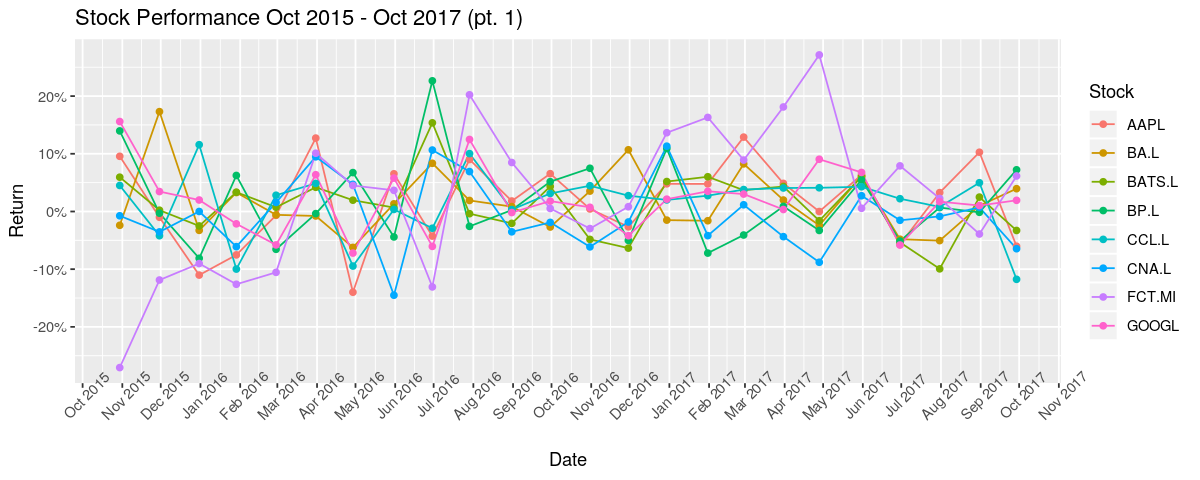

In [127]:
ggplot(data=melted.fh.df, aes(x=as.Date(melted.fh.df$month), y=melted.fh.df$value,
                           group=melted.fh.df$variable, color=melted.fh.df$variable)) +
geom_line() + geom_point() +
xlab("Date") + ylab("Return") + scale_y_continuous(labels=percent) +
scale_x_date(date_breaks = "1 month", date_labels =  "%b %Y") +
scale_color_discrete("Stock") + ggtitle("Stock Performance Oct 2015 - Oct 2017 (pt. 1)") +
theme(axis.text.x = element_text(angle = 45))
ggsave("stockperf.pdf", width=8, height=4)

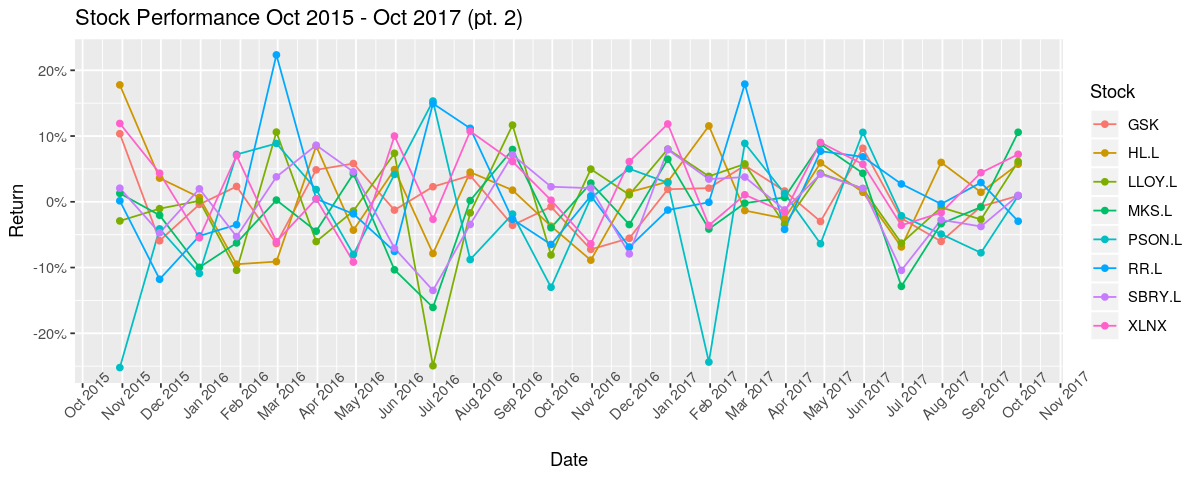

In [126]:
ggplot(data=melted.sh.df, aes(x=as.Date(melted.sh.df$month), y=melted.sh.df$value,
                           group=melted.sh.df$variable, color=melted.sh.df$variable)) +
geom_line() + geom_point() +
xlab("Date") + ylab("Return") + scale_y_continuous(labels=percent) +
scale_x_date(date_breaks = "1 month", date_labels =  "%b %Y") +
scale_color_discrete("Stock") + ggtitle("Stock Performance Oct 2015 - Oct 2017 (pt. 2)") +
theme(axis.text.x = element_text(angle = 45))
ggsave("stockperf2.pdf", width=8, height=4)

In [178]:
mean.returns <- c(sapply(df[2:17], function(x) mean(x)))
sort(mean.returns, decreasing = TRUE)

FCT.MI         XLNX        GOOGL         AAPL         BP.L         BA.L 
 0.024263823  0.023357088  0.019275849  0.017055464  0.016862250  0.015512908 
       CCL.L         RR.L       BATS.L         HL.L          GSK       LLOY.L 
 0.014776045  0.013892051  0.011739811  0.010082038  0.002738018 -0.001592858 
      SBRY.L        CNA.L        MKS.L       PSON.L 
-0.002191916 -0.006349440 -0.012622429 -0.020788593

In [219]:
mean.mean.returns <- sum(mean.returns)/length(mean.returns)
mean.mean.returns*100

[1] 0.7875632

In [17]:
cov.matrix <- cov(df[2:17])

obj.weights <- seq(from = 0, to = 1, by = 0.01)
#obj.weights <- obj.weights[-1]
hof <- vector("list", length(obj.weights))
hof.fitness <- vector("list", length(obj.weights))
lower.bounds <- c(rep(0, length(assets)))
upper.bounds <- c(rep(1, length(assets)))

normalise <- function(chromosome){
    total <- sum(chromosome)
    return(chromosome / total)
}

getMeanReturn <- function(mean.returns) {
    return(sum(mean.returns))
}

getTotalReturn <- function(mean.returns, weights) {
    return(sum(mean.returns * weights))
}

getTotalRisk <- function(cov.matrix, weights) {
    m <- cov.matrix
    m <- mapply("*", as.data.frame(m), weights)
    m <- t(m)
    m <- mapply("*", as.data.frame(m), weights)
    return(sum(m))
}

getFitness <- function(chromosome) {
    weights = normalise(chromosome)
    f = getTotalReturn(mean.returns, weights)
    g = getTotalRisk(cov.matrix, weights)
    fitness = w * f + (1 - w) * (-g)
    return(fitness)
}

[1] "Run 1, Ret. w: 0"
[1] "Run 2, Ret. w: 0.01"
[1] "Run 3, Ret. w: 0.02"
[1] "Run 4, Ret. w: 0.03"
[1] "Run 5, Ret. w: 0.04"
[1] "Run 6, Ret. w: 0.05"
[1] "Run 7, Ret. w: 0.06"
[1] "Run 8, Ret. w: 0.07"
[1] "Run 9, Ret. w: 0.08"
[1] "Run 10, Ret. w: 0.09"
[1] "Run 11, Ret. w: 0.1"
[1] "Run 12, Ret. w: 0.11"
[1] "Run 13, Ret. w: 0.12"
[1] "Run 14, Ret. w: 0.13"
[1] "Run 15, Ret. w: 0.14"
[1] "Run 16, Ret. w: 0.15"
[1] "Run 17, Ret. w: 0.16"
[1] "Run 18, Ret. w: 0.17"
[1] "Run 19, Ret. w: 0.18"
[1] "Run 20, Ret. w: 0.19"
[1] "Run 21, Ret. w: 0.2"
[1] "Run 22, Ret. w: 0.21"
[1] "Run 23, Ret. w: 0.22"
[1] "Run 24, Ret. w: 0.23"
[1] "Run 25, Ret. w: 0.24"
[1] "Run 26, Ret. w: 0.25"
[1] "Run 27, Ret. w: 0.26"
[1] "Run 28, Ret. w: 0.27"
[1] "Run 29, Ret. w: 0.28"
[1] "Run 30, Ret. w: 0.29"
[1] "Run 31, Ret. w: 0.3"
[1] "Run 32, Ret. w: 0.31"
[1] "Run 33, Ret. w: 0.32"
[1] "Run 34, Ret. w: 0.33"
[1] "Run 35, Ret. w: 0.34"
[1] "Run 36, Ret. w: 0.35"
[1] "Run 37, Ret. w: 0.36"
[1] "Run 38, Ret

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  20 
Number of generations =  2000 
Elitism               =  1 
Crossover probability =  0.8 
Mutation probability  =  0.05 
Search domain = 
      x1 x2 x3 x4 x5 x6 x7 x8 x9 x10  ...  x15 x16
lower  0  0  0  0  0  0  0  0  0   0         0   0
upper  1  1  1  1  1  1  1  1  1   1         1   1

GA results: 
Iterations             = 2000 
Fitness function value = 0.02282392 
Solution = 
              x1          x2         x3         x4         x5          x6
[1,] 0.006113582 0.003541213 0.01988132 0.02232881 0.00742223 0.004321396
            x7         x8          x9         x10  ...          x15       x16
[1,] 0.9834421 0.02354091 0.004426564 0.004170156       0.004795941 0.9610718

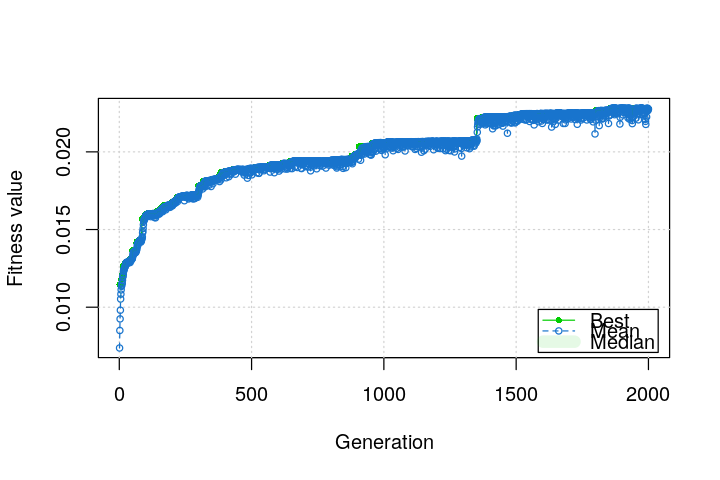

In [18]:
for(i in seq_along(obj.weights)){
    w <- obj.weights[i]
    print(paste0("Run ", i, ", Ret. w: ", w))
    GA <- GA::ga(type='real-valued',
                 fitness = getFitness,
                 maxiter = 2000,
                 popSize = 100,
                 pcrossover = 0.8,
                 pmutation = 0.05,
                 lower = lower.bounds,
                 upper = upper.bounds,
                 seed = 123)
    hof[[i]] <- normalise(GA@solution)
    hof.fitness[[i]] <- GA@fitnessValue
}

summary(GA)
plot(GA)

In [19]:
hof

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0.0004779864,0.1718505,0.02460926,0.1728627,0.2063844,0.0090485,0.0367896,0.0003782795,0.1338882,0.0383236,0.1411329,0.002497531,0.03985905,0.001363137,0.01963432,0.0009000885
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0.0005660537,0.2052273,0.03472457,0.1997571,0.2267264,0.0008834557,0.05239483,0.0003212818,0.105799,0.01762759,0.1375891,0.00267088,0.006357912,0.005728004,0.002718074,0.0009084827
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0.0007801188,0.2148231,0.04021448,0.21783,0.2314716,0.0009315041,0.06373896,0.0007595961,0.05886085,0.02697448,0.1216364,0.002769495,0.001248754,0.01322504,0.003273987,0.001461754
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0.0006010785,0.218073,0.04790222,0.2275157,0.241268,0.0009080873,0.07268702,0.003113992,0.01279465,0.03326067,0.1015966,0.002868879,0.001260709,0.02021076,0.00277771,0.01316085
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0.0005864297,0.2234265,0.02787552,0.234416,0.2493525,0.0009345535,0.08197356,0.003034977,0.001393492,0.03248272,0.07867944,0.002936679,0.001309097,0.0246495,0.001927503,0.03502163
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16


In [20]:
hof.fitness
sum(unlist(hof[1]))

[[1]]
[1] -0.0004074583

[[2]]
[1] -0.0002928212

[[3]]
[1] -0.0001648383

[[4]]
[1] -2.779845e-05

[[5]]
[1] 0.0001205641

[[6]]
[1] 0.0002763628

[[7]]
[1] 0.0004401891

[[8]]
[1] 0.000610603

[[9]]
[1] 0.0007877219

[[10]]
[1] 0.0009668448

[[11]]
[1] 0.001147559

[[12]]
[1] 0.001331248

[[13]]
[1] 0.001515919

[[14]]
[1] 0.00169914

[[15]]
[1] 0.001887683

[[16]]
[1] 0.002076551

[[17]]
[1] 0.002264747

[[18]]
[1] 0.002455704

[[19]]
[1] 0.002643687

[[20]]
[1] 0.00283686

[[21]]
[1] 0.003030884

[[22]]
[1] 0.003224331

[[23]]
[1] 0.003415076

[[24]]
[1] 0.003612641

[[25]]
[1] 0.00380694

[[26]]
[1] 0.004009837

[[27]]
[1] 0.004210273

[[28]]
[1] 0.004411286

[[29]]
[1] 0.004610089

[[30]]
[1] 0.004816547

[[31]]
[1] 0.005017421

[[32]]
[1] 0.005228079

[[33]]
[1] 0.005435369

[[34]]
[1] 0.005646959

[[35]]
[1] 0.005862656

[[36]]
[1] 0.006089805

[[37]]
[1] 0.006295845

[[38]]
[1] 0.006525117

[[39]]
[1] 0.006749503

[[40]]
[1] 0.006985726

[[41]]
[1] 0.007199137

[[42]]
[1] 0.007424335

[[43]]
[1] 0.007656663

[[44]]
[1] 0.007914402

[[45]]
[1] 0.008160981

[[46]]
[1] 0.008398392

[[47]]
[1] 0.008644578

[[48]]
[1] 0.0088806

[[49]]
[1] 0.009121116

[[50]]
[1] 0.009344729

[[51]]
[1] 0.009611704

[[52]]
[1] 0.009844781

[[53]]
[1] 0.01011981

[[54]]
[1] 0.01034235

[[55]]
[1] 0.01057371

[[56]]
[1] 0.01080663

[[57]]
[1] 0.01107956

[[58]]
[1] 0.01132748

[[59]]
[1] 0.01157989

[[60]]
[1] 0.01181778

[[61]]
[1] 0.01204072

[[62]]
[1] 0.01231764

[[63]]
[1] 0.01257798

[[64]]
[1] 0.01282588

[[65]]
[1] 0.01311347

[[66]]
[1] 0.01338776

[[67]]
[1] 0.01364289

[[68]]
[1] 0.01386789

[[69]]
[1] 0.01415323

[[70]]
[1] 0.014427

[[71]]
[1] 0.0146441

[[72]]
[1] 0.01485957

[[73]]
[1] 0.01510693

[[74]]
[1] 0.01537531

[[75]]
[1] 0.01569442

[[76]]
[1] 0.01593833

[[77]]
[1] 0.01616084

[[78]]
[1] 0.0164083

[[79]]
[1] 0.01672451

[[80]]
[1] 0.01707542

[[81]]
[1] 0.01735636

[[82]]
[1] 0.01751399

[[83]]
[1] 0.01780878

[[84]]
[1] 0.01814278

[[85]]
[1] 0.01837892

[[86]]
[1] 0.01868349

[[87]]
[1] 0.01895653

[[88]]
[1] 0.01925544

[[89]]
[1] 0.01953104

[[90]]
[1] 0.01982052

[[91]]
[1] 0.020082

[[92]]
[1] 0.02035114

[[93]]
[1] 0.02063367

[[94]]
[1] 0.02087713

[[95]]
[1] 0.02117693

[[96]]
[1] 0.02143769

[[97]]
[1] 0.02168138

[[98]]
[1] 0.0220217

[[99]]
[1] 0.02227112

[[100]]
[1] 0.02249892

[[101]]
[1] 0.02282392

[1] 1

In [21]:
returns <- vector('list', length(obj.weights))
risks <- vector('list', length(obj.weights))
sharpe_ratios <- vector('list', length(obj.weights))
points <- vector('list', length(obj.weights))

for(i in 1:length(obj.weights)) {
  sol.weights <- (unlist(hof[i]))   
  risk <- getTotalRisk(cov.matrix, sol.weights)
  exp.return <- getTotalReturn(mean.returns, sol.weights)
  returns[i] <- exp.return
  risks[i] <- risk
  sharpe_ratios[i] <- exp.return / sqrt(risk)
  points[[i]] <- c(risk, exp.return)
}

even.weighted.solution <- normalise(rep(1, length(assets)))
e.w.sol.return <- getTotalReturn(mean.returns, even.weighted.solution)
e.w.sol.risk <- getTotalRisk(cov.matrix, even.weighted.solution)

rand.solutions <- 1000
rand.obj.weights <- vector('list', length(assets))
rand.returns <- vector('list', rand.solutions)
rand.risks <- vector('list', rand.solutions)
rand.ratios <- vector('list', rand.solutions)

for(j in 1:rand.solutions) {
  rand.obj.weights[[j]] <- normalise(runif(length(assets)))
  rand.risk <- getTotalRisk(cov.matrix, rand.obj.weights[[j]])
  rand.exp.return <- getTotalReturn(mean.returns, rand.obj.weights[[j]])
  rand.returns[j] <- rand.exp.return
  rand.risks[j] <- rand.risk
  rand.ratios[j] <- rand.exp.return / sqrt(rand.risk)
}

In [115]:
p <- portfolio.spec(assets)
p <- add.constraint(portfolio = p, type = 'weight_sum', 
                    min_sum = 1, max_sum = 1)
p <- add.constraint(portfolio = p, type = 'box', min = 0, max = 1)
p <- add.objective(portfolio = p, type = 'risk', name = 'StdDev')
p <- add.objective(portfolio=p, type="return", name="mean")
pa.df <- df
pa.df["month"] <- NULL
opt <- optimize.portfolio(pa.df, portfolio=p, optimize_method='quadprog',
                          search_size=10000)
print(opt)

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = pa.df, portfolio = p, optimize_method = "quadprog", 
    search_size = 10000)

Optimal Weights:
  AAPL   BA.L BATS.L   BP.L  CCL.L  CNA.L FCT.MI  GOOGL    GSK   HL.L LLOY.L 
0.0000 0.0000 0.0000 0.0412 0.0000 0.0000 0.2080 0.0000 0.0000 0.0000 0.0000 
 MKS.L PSON.L   RR.L SBRY.L   XLNX 
0.0000 0.0000 0.0000 0.0000 0.7508 

Objective Measure:
   mean 
0.02328 


 StdDev 
0.05625 





In [116]:
pa.weights <- extractWeights(opt)
pa.weights

AAPL          BA.L        BATS.L          BP.L         CCL.L 
 2.119767e-17  8.006052e-17  2.645019e-17  4.120989e-02  1.162189e-17 
        CNA.L        FCT.MI         GOOGL           GSK          HL.L 
-7.816054e-17  2.080129e-01  8.502608e-18 -1.422581e-15 -2.975004e-17 
       LLOY.L         MKS.L        PSON.L          RR.L        SBRY.L 
 3.474350e-16  3.175820e-15 -9.017317e-16  1.387779e-17 -9.994357e-17 
         XLNX 
 7.507772e-01

In [114]:
pa.rand.weights <- extractWeights(opt)
pa.rand.weights

AAPL   BA.L BATS.L   BP.L  CCL.L  CNA.L FCT.MI  GOOGL    GSK   HL.L LLOY.L 
 0.004  0.134  0.130  0.176  0.148  0.000  0.022  0.074  0.044  0.030  0.194 
 MKS.L PSON.L   RR.L SBRY.L   XLNX 
 0.004  0.002  0.022  0.016  0.000

In [57]:
#print(unlist(sharpe_ratios))
#print(max(sapply(sharpe_ratios, max)))
#print(points[2])
#print(unlist(risks))
#print(min(sapply(risks, min)))
print(unlist(returns))
print(max(sapply(returns, max)))

  [1] 0.009635609 0.011946267 0.012921965 0.013913220 0.014771013 0.015472937
  [7] 0.016187788 0.016879756 0.017251199 0.017323129 0.017583302 0.017730817
 [13] 0.017803228 0.017880763 0.017980136 0.018108732 0.018192244 0.018326677
 [19] 0.018431555 0.018573720 0.018657865 0.018701538 0.018776391 0.018899574
 [25] 0.018946370 0.019068907 0.019239503 0.019286562 0.019388333 0.019527495
 [31] 0.019663075 0.019829227 0.019913855 0.020038102 0.020181061 0.020379333
 [37] 0.020485339 0.020518105 0.020559517 0.020672909 0.020770685 0.020871566
 [43] 0.020927745 0.021115724 0.021120782 0.021200021 0.021440740 0.021469928
 [49] 0.021482127 0.021528043 0.021408365 0.021512699 0.021697203 0.021561816
 [55] 0.021758566 0.021745614 0.021940379 0.022059201 0.021977380 0.022074076
 [61] 0.022108271 0.022127439 0.022220513 0.022203209 0.022094423 0.022206873
 [67] 0.022303450 0.022296995 0.022446949 0.022395614 0.022516522 0.022501266
 [73] 0.022394560 0.022564734 0.022600670 0.022556115 0.02267495

In [22]:
pa.risk <- getTotalRisk(cov.matrix, pa.weights)
pa.exp.return <- getTotalReturn(mean.returns, pa.weights)

In [23]:
pa.rand.risk <- getTotalRisk(cov.matrix, pa.rand.weights)
pa.rand.exp.return <- getTotalReturn(mean.returns, pa.rand.weights)

In [24]:
rand.df <- as.data.frame(cbind(as.numeric(rand.risks), as.numeric(rand.returns)))
ga.df <- as.data.frame(cbind(as.numeric(risks), as.numeric(returns)))

plotReturns <- function(hof) {
    ggplot() +
      geom_line(data=ga.df, aes(x=ga.df$V1, y=ga.df$V2, linetype="Efficient Frontier"), size=0.3) +
      geom_point(data=rand.df, aes(x=rand.df$V1, y=rand.df$V2, fill=unlist(rand.ratios)), color=unlist(rand.ratios), shape=21) +
      geom_point(data=ga.df, aes(x=ga.df$V1, y=ga.df$V2, fill=unlist(sharpe_ratios)), shape=23, size=2) +
      geom_point(aes(x=e.w.sol.risk, y=e.w.sol.return, colour="Weighted Evenly"), size=3) +
      geom_point(aes(x=ga.df$V1[8], y=ga.df$V2[8], colour="Highest Sharpe Ratio"), size=3) +
      geom_point(aes(x=ga.df$V1[1], y=ga.df$V2[1], colour="Minimum Risk"), size=3) +
      geom_point(aes(x=ga.df$V1[99], y=ga.df$V2[99], colour="Maximum Return"), size=3) +
      geom_point(aes(x=pa.rand.risk, y=pa.rand.exp.return, colour="PortfolioAnalytics Random"), size=3) +
      geom_point(aes(x=pa.risk, y=pa.exp.return, colour="PortfolioAnalytics ROI"), size=3) +
      ggtitle("Portfolio Solutions") +
      scale_linetype("Line Type") + scale_color_discrete("Portfolios") +
      scale_fill_gradient("Sharpe Ratio", low="red", high="blue") +
      scale_y_continuous(name="Return", labels=percent) +
      scale_x_continuous(name="Risk", labels=percent)
}


[[1]]
              x1        x2          x3        x4        x5         x6        x7
[1,] 0.001349992 0.2236794 0.002491133 0.2275045 0.2490986 0.00125385 0.1030972
             x8          x9         x10        x11         x12          x13
[1,] 0.02409162 0.001295989 0.004978636 0.01742909 0.000618142 1.274175e-05
           x14         x15       x16
[1,] 0.0375161 0.004795499 0.1007876

[1] "0.000607950340034779, 0.0168797560291624"


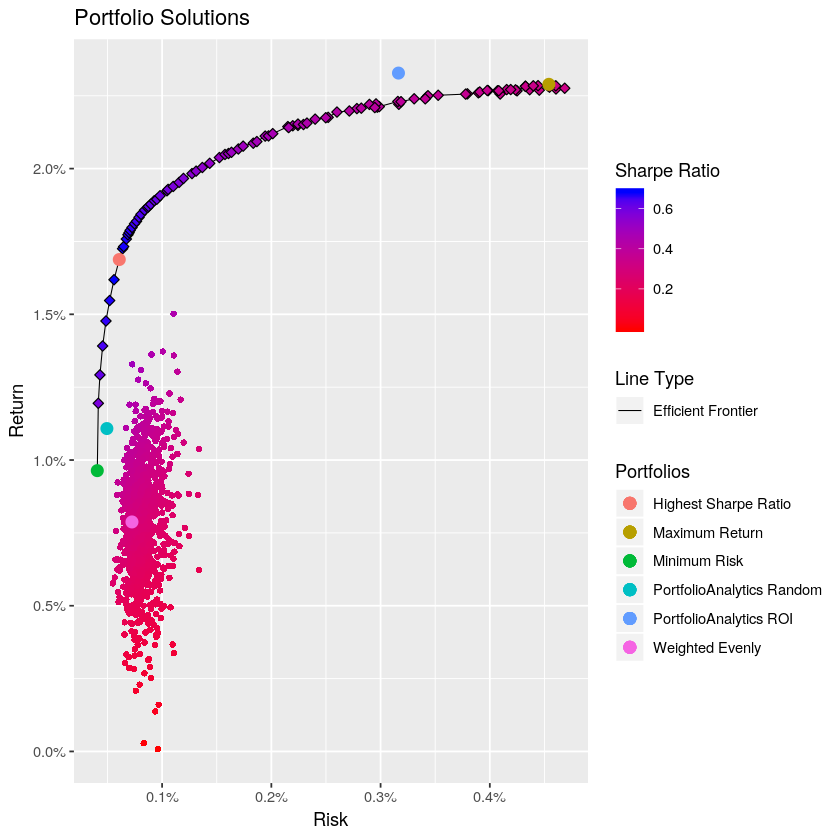

In [25]:
plotReturns(hof) 
ggsave("GAcurv2.pdf", width=8, height=4.3)    
print(hof[8])
print(paste0(ga.df$V1[8], ", ", ga.df$V2[8]))

In [138]:
plotShareAlph <- function(title, solution) {
    ggplot(solution, aes(x=sort(solution$asset, decreasing = TRUE), y=solution$pf.share, fill=solution$asset)) + 
    geom_bar(stat = "identity", show.legend=FALSE) + 
    scale_y_continuous(labels=percent) + scale_x_discrete(labels=sort(solution$asset, decreasing = TRUE)) +
    ggtitle(title) + labs(x = "Stock", y = "Portfolio Share") + coord_flip()
}

In [142]:
plotShare <- function(title, solution) {
    ggplot(solution, aes(x=reorder(solution$asset, solution$pf.share), y=solution$pf.share, fill=solution$asset)) +
    geom_bar(stat = "identity", show.legend=FALSE) +
    scale_y_continuous(labels=percent) +
    labs(x = "Stock", y = "Portfolio Share") +
    ggtitle(title) + coord_flip()
}

In [98]:
create.sol.df <- function(solution) {
    sol.df <- data.frame(
        asset <- assets,
        pf.share <- solution
    )
    return(sol.df)
}

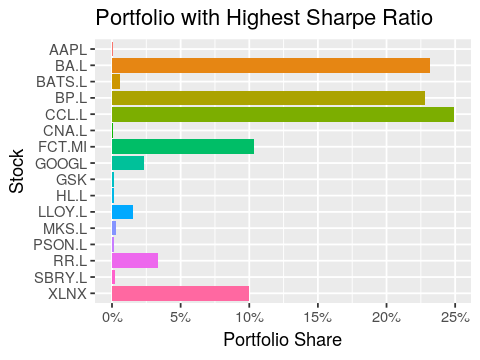

In [149]:
best.sharpe.sol <- create.sol.df(as.numeric(unlist(hof[8])))
plotShareAlph("Portfolio with Highest Sharpe Ratio", best.sharpe.sol)
ggsave("max_sharpe_sh.pdf", width=4, height=3)

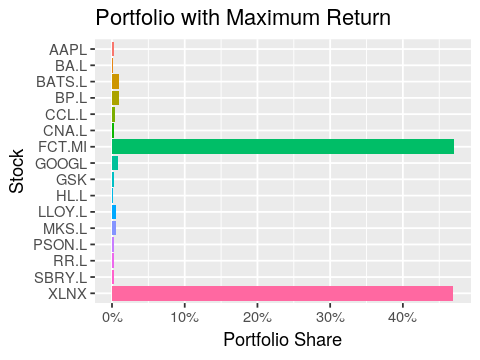

In [150]:
max.ret.sol <- create.sol.df(as.numeric(unlist(hof[99])))
plotShareAlph("Portfolio with Maximum Return", max.ret.sol)
ggsave("max_ret_sh.pdf", width=4, height=3)

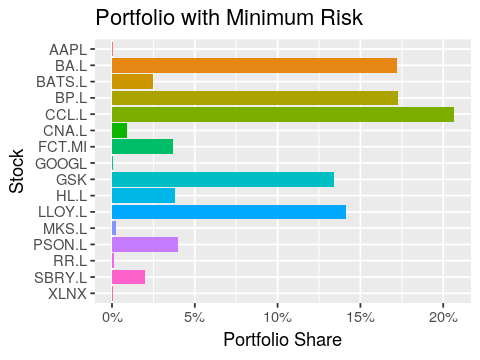

In [152]:
min.risk.sol <- create.sol.df(as.numeric(unlist(hof[1])))
plotShareAlph("Portfolio with Minimum Risk", min.risk.sol)
ggsave("min_risk_sh.pdf", width=4, height=3)

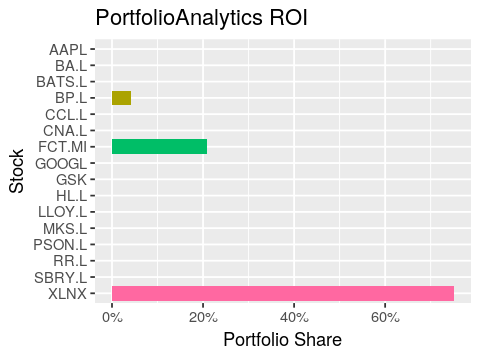

In [153]:
pa.sol <- create.sol.df(pa.weights)
plotShareAlph("PortfolioAnalytics ROI", pa.sol)
ggsave("pa_roi_sh.pdf", width=4, height=3)

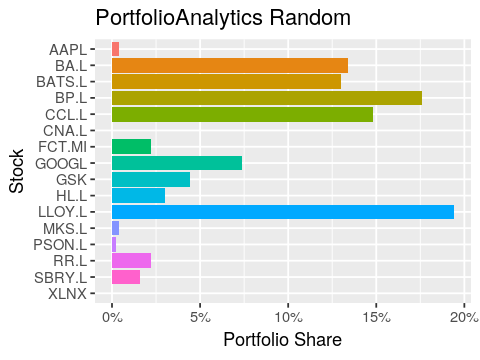

In [154]:
pa.rand.sol <- create.sol.df(pa.rand.weights)
plotShareAlph("PortfolioAnalytics Random", pa.rand.sol)
ggsave("pa_rand_sh.pdf", width=4, height=3)

In [159]:
future.stocks = lapply(assets, function(sym) {
  monthlyReturn(na.omit(getSymbols(sym,
                                   src="yahoo",
                                   from="2017-10-01",
                                   to="2018-10-01",
                                   auto.assign=FALSE)))
})

future.df <- as.data.frame(do.call(merge.xts, future.stocks))
future.df <- cbind(month = rownames(future.df), future.df)
names(future.df)[2:17] <- assets
future.df

Warning message:
“FCT.MI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“MKS.L contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“PSON.L contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“RR.L contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

,month,AAPL,BA.L,BATS.L,BP.L,CCL.L,CNA.L,FCT.MI,GOOGL,GSK,HL.L,LLOY.L,MKS.L,PSON.L,RR.L,SBRY.L,XLNX
2017-10-31,2017-10-31,0.095812255,-0.061660079,0.03936840,0.062806009,0.04530131,-0.091006423,0.05221675,0.058822338,-0.102709315,0.06891892,0.0096097281,-0.02714166,0.147634584,0.093258427,0.019764495,0.03744901
2017-11-30,2017-11-30,0.016623362,-0.069924179,-0.03736399,-0.041356342,-0.03930659,-0.148409874,0.12265918,0.003029897,-0.037606341,0.01264223,-0.0335334744,-0.08979946,0.006396588,-0.119218911,-0.042061843,-0.05672411
2017-12-29,2017-12-29,-0.015245912,0.038043478,0.07016421,0.068697619,0.02643726,-0.050484113,0.04420350,0.016628526,0.011694238,0.12484395,0.0312120909,0.00510848,0.039548023,-0.011668611,0.039173443,-0.03006767
2018-01-31,2018-01-31,-0.010636430,0.036649215,-0.03965723,-0.041323906,0.01594440,-0.028040830,0.14936102,0.122289675,0.057513305,0.03079911,0.0213047905,-0.04288437,-0.057336973,0.029515939,0.045981799,0.08306139
2018-02-28,2018-02-28,0.063847593,-0.024579084,-0.10863250,-0.051786094,-0.03440644,0.071562407,-0.08825573,-0.066231267,-0.031991391,-0.07106326,-0.0102143430,-0.01891796,0.055635683,-0.037155991,0.025742574,-0.02423989
2018-03-29,2018-03-29,-0.058050731,0.003451847,-0.03829589,0.008628867,-0.04563451,-0.005594427,-0.09298780,-0.060493538,0.076012088,-0.05360765,-0.0601744014,-0.08592691,0.022665177,0.038113388,-0.077992266,0.01389471
2018-04-30,2018-04-30,-0.015019693,0.050911549,-0.03195352,0.122587376,0.03165939,0.081575290,0.09831933,-0.017895364,0.026618915,0.09583588,0.0000000000,0.06476684,0.113217607,-0.036255136,0.293969833,-0.11074197
2018-05-30,2018-05-30,NA,NA,NA,NA,NA,NA,0.01377200,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-05-31,2018-05-31,0.130763649,0.046481218,-0.03250813,0.071189569,0.02370370,-0.051365467,NA,0.079934793,0.010221865,0.06566080,-0.0224250682,-0.01286066,0.081314451,-0.018333362,0.030097049,0.06024289
2018-06-29,2018-06-29,-0.009418280,0.011573293,-0.01008012,0.003470415,-0.10130246,0.080534616,-0.11849057,0.026536310,-0.005182601,0.03382276,-0.0025312451,0.03908453,-0.018411686,0.198399273,0.009110977,-0.04184406


In [160]:
future.df[9,8] <- future.df[8,8]
future.df[14,8] <- -0.11346154
future.df <- na.omit(future.df)
future.df

,month,AAPL,BA.L,BATS.L,BP.L,CCL.L,CNA.L,FCT.MI,GOOGL,GSK,HL.L,LLOY.L,MKS.L,PSON.L,RR.L,SBRY.L,XLNX
2017-10-31,2017-10-31,0.095812255,-0.061660079,0.03936840,0.062806009,0.04530131,-0.091006423,0.05221675,0.058822338,-0.102709315,0.06891892,0.0096097281,-0.02714166,0.147634584,0.093258427,0.019764495,0.03744901
2017-11-30,2017-11-30,0.016623362,-0.069924179,-0.03736399,-0.041356342,-0.03930659,-0.148409874,0.12265918,0.003029897,-0.037606341,0.01264223,-0.0335334744,-0.08979946,0.006396588,-0.119218911,-0.042061843,-0.05672411
2017-12-29,2017-12-29,-0.015245912,0.038043478,0.07016421,0.068697619,0.02643726,-0.050484113,0.04420350,0.016628526,0.011694238,0.12484395,0.0312120909,0.00510848,0.039548023,-0.011668611,0.039173443,-0.03006767
2018-01-31,2018-01-31,-0.010636430,0.036649215,-0.03965723,-0.041323906,0.01594440,-0.028040830,0.14936102,0.122289675,0.057513305,0.03079911,0.0213047905,-0.04288437,-0.057336973,0.029515939,0.045981799,0.08306139
2018-02-28,2018-02-28,0.063847593,-0.024579084,-0.10863250,-0.051786094,-0.03440644,0.071562407,-0.08825573,-0.066231267,-0.031991391,-0.07106326,-0.0102143430,-0.01891796,0.055635683,-0.037155991,0.025742574,-0.02423989
2018-03-29,2018-03-29,-0.058050731,0.003451847,-0.03829589,0.008628867,-0.04563451,-0.005594427,-0.09298780,-0.060493538,0.076012088,-0.05360765,-0.0601744014,-0.08592691,0.022665177,0.038113388,-0.077992266,0.01389471
2018-04-30,2018-04-30,-0.015019693,0.050911549,-0.03195352,0.122587376,0.03165939,0.081575290,0.09831933,-0.017895364,0.026618915,0.09583588,0.0000000000,0.06476684,0.113217607,-0.036255136,0.293969833,-0.11074197
2018-05-31,2018-05-31,0.130763649,0.046481218,-0.03250813,0.071189569,0.02370370,-0.051365467,0.01377200,0.079934793,0.010221865,0.06566080,-0.0224250682,-0.01286066,0.081314451,-0.018333362,0.030097049,0.06024289
2018-06-29,2018-06-29,-0.009418280,0.011573293,-0.01008012,0.003470415,-0.10130246,0.080534616,-0.11849057,0.026536310,-0.005182601,0.03382276,-0.0025312451,0.03908453,-0.018411686,0.198399273,0.009110977,-0.04184406
2018-07-31,2018-07-31,0.027983318,0.009894904,0.09686684,-0.008646032,0.01794341,-0.056454135,0.10530822,0.086814473,0.031753882,0.05300533,-0.0106264554,0.04371397,0.044745736,0.002833422,0.018057247,0.10435179


In [161]:
future.mean.returns <- c(sapply(future.df[2:17], function(x) mean(x)))
sort(future.mean.returns, decreasing = TRUE)

HL.L          AAPL        PSON.L        FCT.MI        SBRY.L 
 0.0363747836  0.0345485888  0.0331462541  0.0308415229  0.0288231452 
        GOOGL          BP.L          XLNX          RR.L         CCL.L 
 0.0194249709  0.0188046976  0.0121141562  0.0113419307  0.0013010537 
         BA.L           GSK        LLOY.L         CNA.L         MKS.L 
 0.0006547007  0.0001640187 -0.0106049245 -0.0127810497 -0.0156730651 
       BATS.L 
-0.0202537113

In [162]:
mean.fut.mean.ret <- sum(future.mean.returns)/length(future.mean.returns)
mean.fut.mean.ret*100

[1] 1.051419

In [163]:
getTotalReturn(future.mean.returns, as.numeric(unlist(hof[8])))*100 # Highest Sharpe Ratio PF

[1] 0.9833008

In [164]:
getTotalReturn(future.mean.returns, even.weighted.solution)*100 # Even weighted PF

[1] 1.051419

In [165]:
getTotalReturn(future.mean.returns, as.numeric(unlist(hof[1])))*100 # Min Risk PF

[1] 0.596968

In [170]:
getTotalReturn(future.mean.returns, as.numeric(unlist(hof[99])))*100 # Max Return PF

[1] 2.051397

In [171]:
getTotalReturn(future.mean.returns, pa.weights)*100 # PA ROI

[1] 1.628541

In [172]:
getTotalReturn(future.mean.returns, pa.rand.weights)*100 # PA Random

[1] 0.2966484

In [173]:
fh.fut.df <- future.df[1:9]
sh.fut.df <- future.df[sh.cols]

melted.fh.fut.df <- melt(fh.fut.df, id="month")
melted.sh.fut.df <- melt(sh.fut.df, id="month")

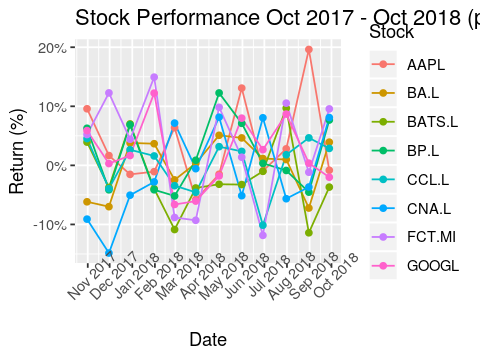

In [175]:
ggplot(data=melted.fh.fut.df, aes(x=as.Date(melted.fh.fut.df$month), y=melted.fh.fut.df$value,
                           group=melted.fh.fut.df$variable, color=melted.fh.fut.df$variable)) +
geom_line() + geom_point() +
xlab("Date") + ylab("Return (%)") + scale_y_continuous(labels=percent) +
scale_x_date(date_breaks = "1 month", date_labels =  "%b %Y") +
scale_color_discrete("Stock") + ggtitle("Stock Performance Oct 2017 - Oct 2018 (pt. 1)") +
theme(axis.text.x = element_text(angle = 45))
ggsave("stockperf2019.pdf", width=8, height=4)

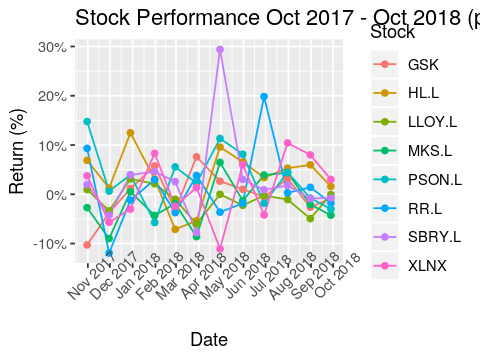

In [176]:
ggplot(data=melted.sh.fut.df, aes(x=as.Date(melted.sh.fut.df$month), y=melted.sh.fut.df$value,
                           group=melted.sh.fut.df$variable, color=melted.sh.fut.df$variable)) +
geom_line() + geom_point() +
xlab("Date") + ylab("Return (%)") + scale_y_continuous(labels=percent) +
scale_x_date(date_breaks = "1 month", date_labels =  "%b %Y") +
scale_color_discrete("Stock") + ggtitle("Stock Performance Oct 2017 - Oct 2018 (pt. 2)") +
theme(axis.text.x = element_text(angle = 45))
ggsave("stockperf2_2019.pdf", width=8, height=4)